<a href="https://colab.research.google.com/github/skibum55/jupyter-notebooks/blob/master/staffing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

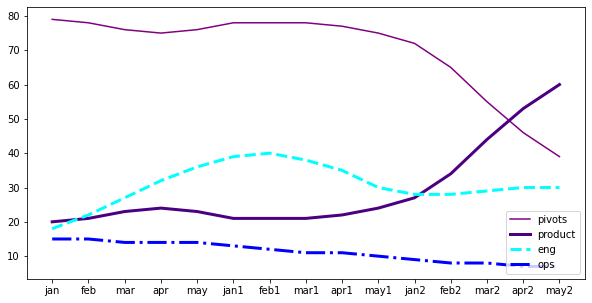

In [19]:
from scipy.ndimage.filters import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = np.array(['jan','feb','mar','apr','may','jan1','feb1','mar1','apr1','may1','jan2','feb2','mar2','apr2','may2'])
pivots = np.array([90,80,70,60,75,90,80,90,60,75,90,80,70,20,25])
product = np.array([10,20,30,40,25,10,20,10,40,25,10,20,30,80,75])
engineering = np.array([6,12,39,44,36,19,62,55,34,29,1,29,37,48,17])
operations = np.array([6,21,13,4,50,19,22,16,4,2,1,2,3,8,5])

ysmoothed = gaussian_filter1d(pivots, sigma=2)
y2smoothed = gaussian_filter1d(product, sigma=2)
y3smoothed = gaussian_filter1d(engineering, sigma=2)
y4smoothed = gaussian_filter1d(operations, sigma=6)
# plt.plot(x, ysmoothed, color='yellow')
# plt.plot(x, y2smoothed, color='Indigo', linestyle='--', linewidth=3)
# plt.plot(x, y3smoothed,  color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
# plt.plot(x, y4smoothed)
# plt.plot(x,y)
line1, = plt.plot(x, ysmoothed, color='purple', label='pivots')
line2, = plt.plot(x, y2smoothed, color='Indigo', linestyle='-', linewidth=3,label='product')
line3, = plt.plot(x, y3smoothed, color='aqua', linestyle='--', linewidth=3,label='eng')
line4, = plt.plot(x, y4smoothed, color='blue', linestyle='-.', linewidth=3,label='ops')
plt.legend(handles=[line1, line2, line3, line4], loc='lower right')
plt.rcParams["figure.figsize"] = [10, 5]
plt.show()

In [10]:
import pandas as pd
dates = ['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04',
         '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
         '2018-02-09', '2018-02-10', '2018-02-11', '2018-02-12',
         '2018-02-13', '2018-02-14', '2018-02-15']
steps = [11178, 9769, 11033, 9757, 10045, 9987, 11067, 11326, 9976, 11359, 10428, 10296, 9377, 10705, 9426]
scheduling = pd.DataFrame(
    {'date': dates, 'steps': steps})
scheduling

,date,steps
0,2018-02-01,11178
1,2018-02-02,9769
2,2018-02-03,11033
3,2018-02-04,9757
4,2018-02-05,10045
5,2018-02-06,9987
6,2018-02-07,11067
7,2018-02-08,11326
8,2018-02-09,9976
9,2018-02-10,11359


In [21]:
scheduling2 = pd.DataFrame({'date': dates, 'pivots': pivots,'eng': engineering, 'product': product, 'eng': engineering, 'ops': operations})
scheduling2

,date,pivots,eng,product,ops
0,2018-02-01,90,6,10,6
1,2018-02-02,80,12,20,21
2,2018-02-03,70,39,30,13
3,2018-02-04,60,44,40,4
4,2018-02-05,75,36,25,50
5,2018-02-06,90,19,10,19
6,2018-02-07,80,62,20,22
7,2018-02-08,90,55,10,16
8,2018-02-09,60,34,40,4
9,2018-02-10,75,29,25,2


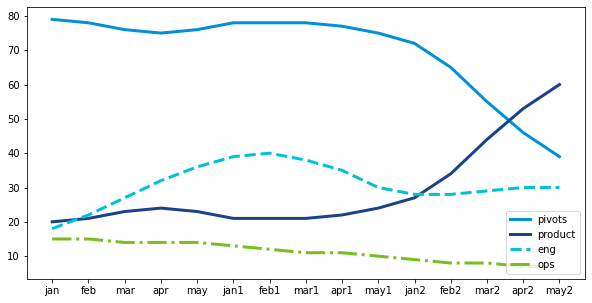

In [31]:
ysmoothed = gaussian_filter1d(scheduling2.set_index('date')['pivots'], sigma=2)
y2smoothed = gaussian_filter1d(scheduling2.set_index('date')['product'], sigma=2)
y3smoothed = gaussian_filter1d(scheduling2.set_index('date')['eng'], sigma=2)
y4smoothed = gaussian_filter1d(scheduling2.set_index('date')['ops'], sigma=6)

line1, = plt.plot(x, ysmoothed, color='#0091DA',linewidth=3, label='pivots')
line2, = plt.plot(x, y2smoothed, color='#1A4288', linestyle='-', linewidth=3,label='product')
line3, = plt.plot(x, y3smoothed, color='#00C1D5', linestyle='--', linewidth=3,label='eng')
line4, = plt.plot(x, y4smoothed, color='#78BE20', linestyle='-.', linewidth=3,label='ops')

plt.legend(handles=[line1, line2, line3, line4], loc='lower right')
plt.rcParams["figure.figsize"] = [10, 5]
plt.show()

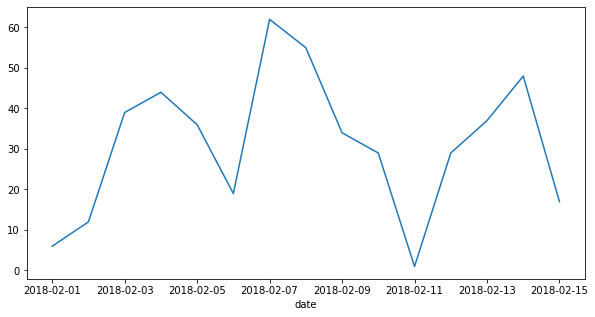

In [24]:
scheduling2.set_index('date')['eng'].plot();

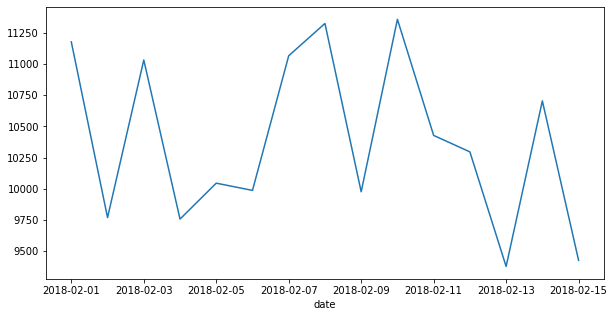

In [11]:
scheduling.set_index('date')['steps'].plot();

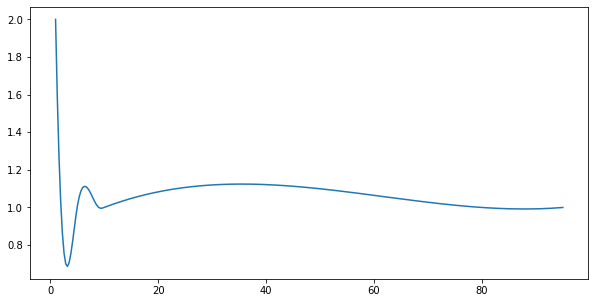

In [13]:
from scipy.interpolate import make_interp_spline, BSpline

T = np.array([1, 2, 5, 9, 10, 80, 95])
power = np.array([2, 1, 1, 1, 1, 1, 1])

# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(T.min(), T.max(), 300) 

spl = make_interp_spline(T, power, k=3)  # type: BSpline
power_smooth = spl(xnew)

plt.plot(xnew, power_smooth)
plt.show()

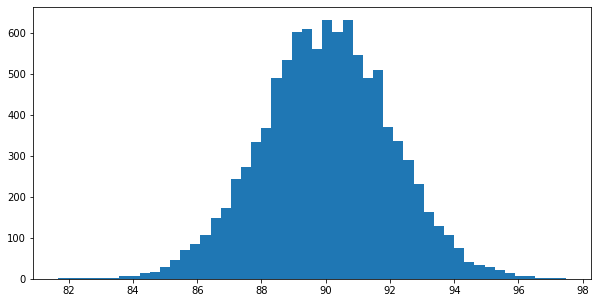

In [14]:
import numpy as np 
import matplotlib.pyplot as plt


values= np.random.normal(90,2, 10000)
plt.hist(values,50)
plt.show()


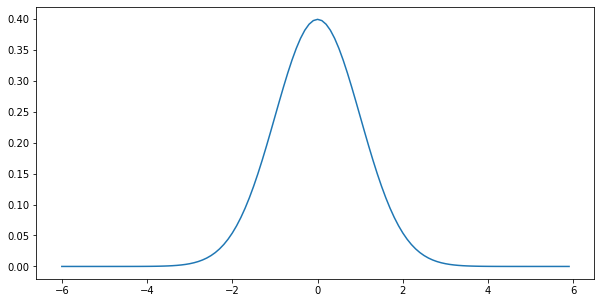

In [15]:
x = np.arange(-6, 6, 0.1) # x from -6 to 6 in steps of 0.1
y = 1 / np.sqrt(2 * np.pi) * np.exp(-x ** 2 / 2.)
plt.plot(x, y)

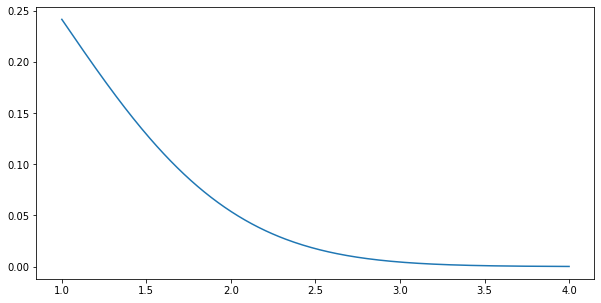

In [16]:
from scipy.interpolate import BSpline, make_interp_spline
x_new = np.linspace(1, 4, 300)
a_BSpline = make_interp_spline(x, y)
y_new = a_BSpline(x_new)

plt.plot(x_new, y_new)

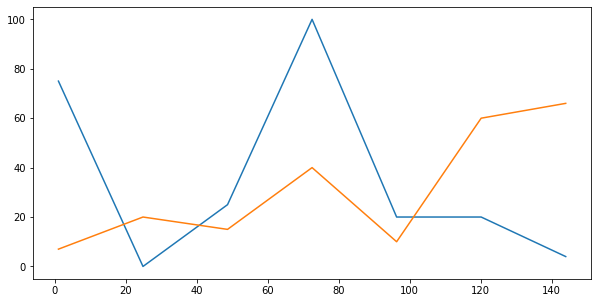

In [17]:
from scipy.interpolate import BSpline, make_interp_spline
weeks = np.linspace(1,144, 7)
y = np.array([75, 0, 25, 100,20,20,4])
y1 = np.array([7, 20, 15, 40,10,60,66])
a_BSpline = make_interp_spline(weeks, y)
a1_BSpline = make_interp_spline(weeks, y1)
y_new = a_BSpline(weeks)
y1_new = a1_BSpline(weeks)

plt.plot(weeks, y_new)
plt.plot(weeks, y1_new)